In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import matplotlib
from sklearn import linear_model
from scipy import stats
from itertools import cycle
import os
import datetime
from matplotlib import colors

matplotlib.rcParams['figure.figsize'] = (16, 10)

colors = cycle(colors.CSS4_COLORS.keys())
DEBUG_DIR = '/home/denis/.birales/debug/detection/'
ROOT = '20180412'
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = os.listdir(os.path.join(DEBUG_DIR, path_to_dir))
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

def plot_candidates(root, csv_files):    
    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    for csv_file in csv_files:
        df = pd.read_csv(os.path.join(DEBUG_DIR, root, csv_file), parse_dates=['time'])
        slope, intercept, r_value, p_value, std_err = stats.linregress(df['channel_sample'],df['time_sample'])    
        
        group = csv_file[21:-4] + ' ({:0.2f})'.format(r_value)
        ax.scatter(y=df['channel_sample'], x=df['time_sample'], alpha=0.8, c=next(colors),label=group)
        ax.legend(loc="upper right")
        
        print(group)
        print('Score: {:0.2f}'.format(r_value))
        print('Size: {:0.2f}'.format(df['channel'].size))
        print('m: {:0.2f}, r: {:0.2f}'.format(slope, r_value))
        print('No. of activated beams: {}'.format(df['beam_id'].unique().size))
        print('Mean Doppler Shift:'.format((410.105 - df['channel'].mean())*1e6))
        print('Mean Channel:'.format(df['channel'].mean()))
        print ''

001 (-1.00)
Score: -1.00
Size: 319.00
m: -0.77, r: -1.00
No. of activated beams: 16
Mean Doppler Shift:
Mean Channel:



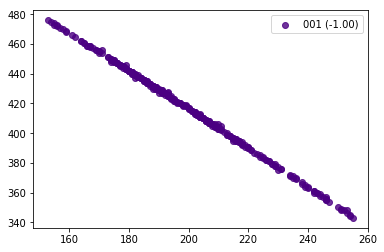

In [2]:
csv_files = find_csv_filenames(ROOT)
plot_candidates(ROOT, csv_files)


In [3]:
# Bandpass plot (SNR against time)
print csv_files[1]
df = pd.read_csv(os.path.join(DEBUG_DIR, ROOT, csv_files[1]), parse_dates=['time'])
df.plot(x='time_sample', y='snr',color=next(colors), title='SNR v. Time')

IndexError: list index out of range

In [ ]:
df.plot(x='channel', y='snr',color=next(colors), title='SNR v. Channel')

In [ ]:
df['t1'] = df['time_sample'] * 0.1048576
df['c1'] = df['channel']

slope1, intercept, r_value, p_value, std_err = stats.linregress(df['t1'],df['c1'])   

print(slope1*1e6,r_value)

slope2, intercept, r_value, p_value, std_err = stats.linregress(df['time_sample'],df['channel'])   
print(slope2 / (np.timedelta64(104857600, 'ns') / np.timedelta64(1, 's')) * 1e6, r_value)

slope2 * 0.1048576 / 1e6